# ML-Fundamentals - Linear Regression - Exercise: Simple Linear Regression

## Table of Contents
* [Introduction](#Introduction)
* [Requirements](#Requirements) 
  * [Knowledge](#Knowledge) 
  * [Modules](#Python-Modules)
* [Exercises: Simple Linear Regression](#Simple-Linear-Regression)
  * [Create a Data Set](#Create-a-Data-Set)
  * [Linear Hypothesis](#Linear-Hypothesis)
  * [Cost Function](#Cost-Function)
  * [Cost Function Visualization](#Cost-Function-Visualization)
  * [Optimizing wit Gradient Descent](#Gradient-Descent)
  * [Model Evaluation](#Model-and-Training-Evaluation)
  * [Optimize Hyperparameters](#Optimize-Hyperparameter)  
* [Summary and Outlook](#Summary-and-Outlook) 
* [Literature](#Literature) 
* [Licenses](#Licenses)

## Introduction
Linear Regression is the _Hello World_ of Machine Learning. In this exercise you will implement a _simple linear regression (univariate linear regression)_, a model with one predictor and one response variable. The goal is to recap and practice fundamental concepts of Machine Learning. After the exercise, you should have a deeper understanding of what a Machine Learning model is and how do you train such a model with a data set (supervised learning). To achieve this, you will:
1. Calculate the cost and the gradient for concrete training data and $\theta$ (pen & paper exercise)
2. Create your own data set
3. Implement a linear function as hypothesis (model) 
4. Write a function to quantify your model (cost function)
5. Learn to visualize the cost function
6. Implement the gradient descent algorithm to train your model (optimizer) 
7. Visualize your training process and results

## Requirements
### Knowledge
You should have a basic knowledge of Machine Learning models, cost functions, optimization algorithms and also numpy and matplotlib. We will only recap these concepts for a better understanding and do not explain them in great detail. Suitable sources for acquiring this knowledge are:
- [Simple Linear Regression Notebook](http://christianherta.de/lehre/dataScience/machineLearning/basics/univariate-linear-regression.php) by Christian Herta and his [lecture slides](http://christianherta.de/lehre/dataScience/machineLearning/linearRegression.pdf) (German)
- Chapter 2 of the open classroom [Machine Learning](http://openclassroom.stanford.edu/MainFolder/CoursePage.php?course=MachineLearning) by Andrew Ng
- Chapter 5.1 of [Deep Learning](http://www.deeplearningbook.org/contents/ml.html) by Ian Goodfellow 
- Some parts of chapter 1 and 3 of [Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/people/cmbishop/#!prml-book) by Christopher M. Bishop
- [numpy quickstart](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html)
- [Matplotlib tutorials](https://matplotlib.org/tutorials/index.html)

### Python Modules

By [deep.TEACHING](https://www.deep-teaching.org/) convention, all python modules needed to run the notebook are loaded centrally at the beginning. 


In [1]:
# External Modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

## Exercises - Simple Linear Regression

### Pen & Paper Exercise

Given the linear model:

$$
h_\theta(x) = \theta_0 + \theta_1 x
$$

And the following concrete training data:

$$
D_{train} = \{(0,1),(1,3),(2,6),(4,8)\}
$$

with each tuple $(x,y)$ denoting $x$ the feature and $y$ the target.

**Task:**

For $\theta_0 = 1$ and $\theta_1 = 2$ calculate:

1. The cost:

$$ J_D(\theta_0, \theta_1)=\frac{1}{2m}\sum_{i=1}^{m}{(h_\theta(x_i)-y_i)^2} $$

2. The gradient $\nabla J$, i.e. the partial derivatives:

$$ \frac{\partial J (\theta_0, \theta_1)}{\partial \theta_0} $$

$$ \frac{\partial J (\theta_0, \theta_1)}{\partial \theta_1} $$


http://mccormickml.com/2014/03/04/gradient-descent-derivation/

### Create a Data Set
First of all, you have to generate a data set $\mathcal D_{train}$. $\mathcal D_{train}$ consists of tuples $(x^{(i)},y^{(i)})$. Let $x$ and $y$ be two numpy arrays of equal-length $m$:

$$
\vec x = \{x^{(1)},x^{(2)}, \ldots, x^{(m)}\} \\
\vec y = \{y^{(1)},y^{(2)}, \ldots, y^{(m)}\}
$$

The $x$ values should be drawn from a **uniform distribution** . Add some noise $\delta$ to the corresponding $y$ values, which should be drawn from a **normal distribution**.

$$
    y^{(i)} = a + b * x^{(i)} + \delta^{(i)}
$$

or as vectors: 

\begin{equation}
    \vec y = a + b * \vec x + \vec \delta
\end{equation}

, with:
* $x \sim Uniform([x_{min}, x_{max}])$
* $\delta \sim Normal(\mu=0.0, \sigma=1.0)$

An example data set could look like this plot (random seed 42 used): 

<img src="https://gitlab.com/deep.TEACHING/educational-materials/raw/dev/media/voigt/images/Simple-Linear-Regression_Data_Set.png" width="512" alt="internet connection needed">

**Hint:**
- To generate the vector for $x$ use the function `np.random.uniform`.
- To generate a vector of the noise use `np.random.randn`.

In [49]:
# fixed random seed
np.random.seed(42)

def linear_random_data(sample_size, a, b, x_min, x_max, noise_factor):
    '''creates a randam data set based on a linear function in a given interval
    
    Args:
        sample_size: number of data points
        a: coefficent of x^0
        b: coefficent of x^1
        x_min: lower bound value range
        x_max: upper bound value range
        noise_factor: strength of noise added to y 
    
    Returns:
        x: array of x values | len(x)==len(y)
        y: array of y values corresponding to x | len(x)==len(y)
    '''
    x = np.random.uniform(x_min, x_max, sample_size)
    y = a + b*x + np.random.randn(sample_size) * noise_factor
    if (len(x) == len(y)):
        return(x, y)
    else:
        raise Exception("WTF")

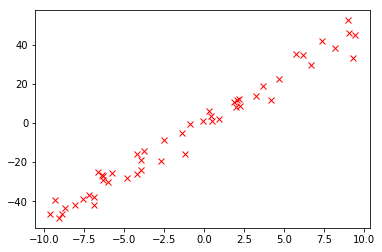

In [50]:
x, y = linear_random_data(sample_size=50, a=0., b=5., x_min=-10, x_max=10, noise_factor=5)
plt.plot(x,y, "rx")

### Linear Hypothesis
A short recap, a hypothesis $h_\theta(x)$ is a certain function that we believe is similar to a target function that we like to model. A hypothesis $h_\theta(x)$ is a function of $x$ with fixed parameters $\theta$. The simplest kind of hypothesis is based on a linear equation with two parameters: 

\begin{equation}
    h_\theta(x) = \theta_{0} + \theta_{1} * x 
\end{equation}

Implement hypothesis $h_\theta(x)$ in the method `linear_hypothesis` and return it as a function. 

In [51]:
def linear_hypothesis(theta_0, theta_1):
    ''' Combines given arguments in a linear equation and returns it as a function
    
    Args:
        theta_0: first coefficient
        theta_1: second coefficient
        
    Returns:
        lambda that models a linear function based on theta_0, theta_1 and x
    ''' 
    return lambda x: theta_0 + theta_1 * x

### Cost Function
A cost function $J$ depends on the given training data $D$ and hypothesis $h_\theta(x)$. In the context of the simple linear regression, the cost function measures how wrong a model is regarding its ability to estimate the relationship between $x$ and $y$ for specific $\theta$ values. Later we will treat this as an optimization problem and try to minimize the cost function $J_D(\theta)$ to find optimal $\theta$ values for our hypothesis $h_\theta(x)$. The cost function we use in this exercise is the [Mean-Squared-Error](https://en.wikipedia.org/wiki/Mean_squared_error) cost function:

\begin{equation}
    J_D(\theta)=\frac{1}{2m}\sum_{i=1}^{m}{(h_\theta(x_i)-y_i)^2}
\end{equation}

Implement the cost function $J_D(\theta)$ in the method `mse_cost_function`. The method should return a function that takes the values of $\theta_0$ and $\theta_1$ as an argument.

Sidenote, the terms loss function or error function are often used interchangeably in the field of Machine Learning.

In [58]:
def mse_cost_function(x, y):
    ''' Implements MSE cost function as a function J(theta_0, theta_1) on given tranings data 
    
    Args:
        x: vector of x values 
        y: vector of ground truth values y 
        
    Returns:
        lambda J(theta_0, theta_1) that models the cost function
    '''
    m = len(x)
    return lambda theta_0, theta_1: 1./2.*m * (linear_hypothesis(theta_0, theta_1)(x) - y)**2
    


In [59]:
j = mse_cost_function(x, y)
print(j(2.1, 2.9))

[3.38004936e+02 7.82060974e+03 1.24803372e+03 7.23980886e+00
 1.43278830e+04 1.01479947e+04 1.31832674e+04 8.61648921e+03
 3.73440540e+02 1.18390994e+02 1.06244880e+04 6.17073279e+03
 1.79690401e+03 3.09323729e+03 2.65655393e+03 2.88401757e+03
 5.26924525e+03 1.69818917e+02 2.72578789e+02 8.97197328e+02
 1.01959899e+00 8.25331617e+03 6.69254856e+03 4.68802841e+03
 3.45558506e-01 6.93771595e+03 5.68044980e+03 3.08970423e+02
 3.22129271e+02 1.48531274e+04 4.46025214e+02 1.70065676e+03
 1.05544425e+04 1.50999992e+04 4.74764850e+02 5.59668658e+03
 2.43590929e+03 1.04988795e+04 9.29210544e+02 5.29361003e+03
 9.09424822e+03 6.68240383e+00 5.08812004e+03 3.90631612e+03
 6.62083994e+03 1.22893933e+02 7.37427756e+02 3.73672943e+00
 1.94179945e+02 4.07667929e+03]


### Visualisation of Hypotheses

Now we want to visualize the data set together with the hypothesis and explore the effects of adjusting the parameters. In your plot,
* show your data set as a scatter plot
* show a hypothesis h(x) as a line plot
* calculate and present the MSE cost (a print statement will do as well)

Here are some questions you may want to address:
* How does the line modeling the hypothesis change when you tweak $\theta_0$?
* How does the line modeling the hypothesis hypothesis change when you tweak $\theta_1$?
* Try some different hypotheses with parameters that are close to the true model and some that are far from the truth. How does this affect the location of the hypothesis in relation to the data?
* What is the effect on the cost?

Your plot could look similar to the following:
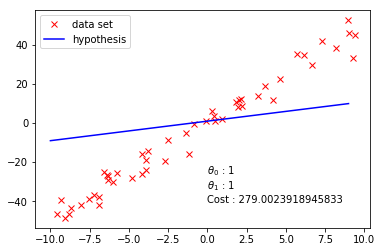

In [85]:
def plot_data_with_hypothesis(x, y, theta0, theta1):
    ''' Plots the data (x, y) together with a hypothesis given theta0 and theta1.    
    '''
    y2 = linear_hypothesis(theta0, theta1)(x)
    plt.plot(x, y2)
    plt.scatter(x, y)

    

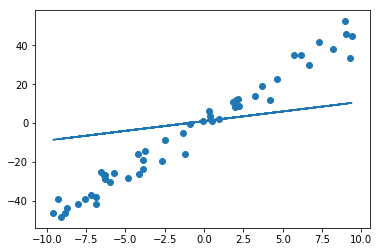

In [88]:
t0 = 1 # Verschiebung auf der y-Achse
t1 = 1 # Anstieg

plot_data_with_hypothesis(x, y, theta0=t0, theta1=t1)

### Cost Function Visualization

After implementing a cost function, it is probably a good idea to visualize it to get from an abstract understanding to a more concrete representation. Use `matplotlib` and plot the cost function in two different ways. Create a [contour plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html) that depicts a three-dimensional surface on a two-dimensional graph and plot the [surface](https://matplotlib.org/tutorials/toolkits/mplot3d.html?highlight=3d%20surface#mpl_toolkits.mplot3d.Axes3D.plot_surface) itself. Your visualization should consist of two subplots and have corresponding labeling, similar to the following example:

![internet connection needed](https://gitlab.com/deep.TEACHING/educational-materials/raw/dev/media/voigt/images/Simple-Linear-Regression_Cost-Function.png)

In [ ]:
def create_cost_plt_data(cost_func, interval, num_samples, x_offset=0., y_offset=0.):
    ''' Creates data for a 3D plot based on a given interval and a cost function
    
    The function creates two vectors t0 and t1 based on the 'interval' and number 
    of data point 'num_samples'. Using 'np.meshgrid' and the vectors two matrices 
    T0 and T1 are created that can be used as X  and Y during the plotting process. 
    Using the given 'cost_func' and the vector an additional matrix 'C ' is 
    created representing the cost for all data point combinations.
    
    Args:
        cost_func: a function that is used to calculate costs C 
        interval: a scalar that defines the range [-interval,interval] data points 
                  are drawn from
        num_samples: number of data points drawn from the interval, equaly distributed 
        x_offset: shifts the interval by a scalar
        y_offset: shifts the interval by a scalar
        
    Returns:
        T0: a matrix representing a meshgrid for X values (Theta 0) 
        T1: a matrix representing a meshgrid for Y values (Theta 1)
        C: a matrix respresenting cost values        
    '''
    raise NotImplementedError("You should implement this!")

def create_cost_plt(T0, T1, Costs):
    ''' Creates a counter and a surface plot based on given data
    
    Args:
        T0: a matrix representing a meshgrid for X values (Theta 0) 
        T1: a matrix representing a meshgrid for Y values (Theta 1)
        C: a matrix respresenting cost values 
    '''
    raise NotImplementedError("You should implement this!")

In [ ]:
# create some data and plot it
T0, T1, C = create_cost_plt_data(mse_cost_function, 1000, 51, y_offset=5.)
create_cost_plt(T0, T1, C)

###  Gradient Descent

A short recap, the gradient descent algorithm is a first-order iterative optimization for finding a minimum of a function. From the current position in a (cost) function, the algorithm steps proportional to the negative of the gradient and repeats this until it reaches a local or global minimum and determines. Stepping proportional means that it does not go entirely in the direction of the negative gradient, but scaled by a fixed value $\alpha$ also called the learning rate. Implementing the following formalized update rule is the core of the optimization process:

\begin{equation}
    \theta_{j_{new}} \leftarrow \theta_{j_{old}} - \alpha * \frac{\delta}{\delta\theta_{j_{old}}} J(\theta_{old})
\end{equation}

$\frac{\delta}{\delta\theta_{j_{old}}} J(\theta_{old})$ is the partial derivative (gradient) of the cost function with respect to the j-th parameter.

Partial derivative for $\theta_0$:
$$
\frac{\partial}{\partial \theta_0} J(\Theta)
= \frac{1}{m} \sum_{i=1}^m (\theta_0 + \theta_1 \cdot x^{(i)} - y^{(i)})
$$

Partial derivative for $\theta_1$:
$$
\frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^m (\theta_0 + \theta_1 \cdot x^{(i)} - y^{(i)}) \cdot x^{(i)}
$$

In [ ]:
def update_theta(x, y, theta_0, theta_1, learning_rate):
    ''' Updates learnable parameters theta_0 and theta_1 
    
    The update is done by calculating the partial derivities of 
    the cost function including the linear hypothesis. The 
    gradients scaled by a scalar are subtracted from the given 
    theta values.
    
    Args:
        x: array of x values
        y: array of y values corresponding to x
        theta_0: current theta_0 value
        theta_1: current theta_1 value
        learning_rate: value to scale the negative gradient 
        
    Returns:
        t0: Updated theta_0
        t1: Updated theta_1
    '''
    raise NotImplementedError("You should implement this!")

Using the `update_theta` method, you can now implement the gradient descent algorithm. Iterate over the update rule to find a $\theta_0$ and a $\theta_1$ that minimize our cost function $J_D(\theta)$. This process is often called training of a machine learning model. During the training process create a history of all theta and cost values. You can use them later for evaluation. Implement a `verbose` argument that if true provides additional information during the process, e.g., final theta values after optimization or cost value at some iterations.

In [ ]:
def gradient_descent(x, y, iterations=1000, learning_rate=0.0001, verbose=False):
    ''' Minimize theta values of a linear model based on MSE cost function
    
    Args:
        x: vector, x values from the data set
        y: vector, y values from the data set
        iterations: scalar, number of theta updates
        learning_rate: scalar, scales the negative gradient 
        verbose: boolean, print addition information 
        
    Returns:
        t0s: list of theta_0 values, one value for each iteration
        t1s: list of theta_1 values, one value for each iteration
        costs: list oft costs, one value for each iteration.
    '''
    raise NotImplementedError("You should implement this!")

In [ ]:
cost_hist, t0_hist, t1_hist = gradient_descent(x, y, iterations=250, learning_rate=0.0003, verbose=True)

###  Model and Training Evaluation
Now visualize the training process by plotting the `cost_hist` as a curve. Also, create a plot that shows the decision boundary of your final hypothesis (model) inside your data. Your plots should look like:

![internet connection needed](https://gitlab.com/deep.TEACHING/educational-materials/raw/dev/media/voigt/images/Simple-Linear-Regression_Decision-Boundary.png)

In [ ]:
def evaluation_plt(cost_hist, theta_0, theta_1, x, y):
    ''' Plots a cost curve and the decision boundary
    
    The Method plots a cost curve from a given training process (cost_hist). 
    It also plots the data set (x,y) and draws a linear decision boundary 
    with the parameters theta_0 and theta_1 into the plotted data set.
    
    Args:
        cost_hist: vector, history of all cost values from a opitmization
        theta_0: scalar, model parameter for boundary
        theta_1: scalar, model parameter for boundary
        x: vector, x values from the data set
        y: vector, y values from the data set
    '''
    raise NotImplementedError("You should implement this!")

In [ ]:
evaluation_plt(cost_hist, t0_hist[-1], t1_hist[-1], x, y)

### Optimize Hyperparameter
In machine learning, hyperparameters are parameters whose values are set before starting the training process of the model. The learning rate is a hyperparameter, and it is a crucial parameter in the context of optimization with first-order methods in supervised learning. It can easily happen that your model does not learn if you have chosen an unsuited learning rate. To find a suitable learning rate for your problem, you need to try different ones. Implement a function `optimize_learning_rate` that trains your model with different learning rates and plots the different cost histories. Try to identify edge cases, e.g., cases when the learning rate is too high or too low, to develop a better feeling for the learning rate problem. Your plot could look like this:

![internet connection needed](https://gitlab.com/deep.TEACHING/educational-materials/raw/dev/media/voigt/images/Simple-Linear-Regression_Learning-Rates.png)

In [ ]:
def optimize_learning_rate(learning_rates, x, y):
    ''' Train a model with diffrent learning rates and plots the costs
    
    Args:
        learning_rates: vector, learning rates used to train a linear model
        x: vector, x values from the data set
        y: vector, y values from the data set
    '''    
    raise NotImplementedError("You should implement this!")

In [ ]:
potential_lr = np.array([0.0001, 0.0007, 0.001, 0.007, .01, .0588, .05899])
optimize_learning_rate(potential_lr, x, y)

## Summary and Outlook

During this exercise, fundamental elements of Machine Learning were covered. You should be able to answer the following questions:
- What is a model using the example of a linear function as a hypothesis?
- How do you quantify a model?
- What is the gradient descent algorithm and what is its used for in the context of Machine Learning?
- Can you explain the concept of hyperparameters and name some?

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g., images).*

Exercise: Simple Linear Regression <br/>
by Christian Herta, Benjamin Voigt, Klaus Strohmenger <br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2018 Christian Herta, Benjamin Voigt, Klaus Strohmenger

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.